In [19]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
import pyreadr

from utils import helpers

from importlib import reload

In [20]:
# Load Outfield Data

# Dan Data

outfield_dims = pyreadr.read_r('fences.rds')[None]

outfield_dims['spray_angle'] = outfield_dims.apply(lambda x: helpers.spray_angle(x.x, x.y),1) 

outfield_dims['team_abv'] = outfield_dims['team'].apply(lambda x: helpers.mapping[x])

# Ben Data

new_dims = pd.read_csv('data/mlb_stadia_paths.csv')

In [30]:
# Load Judge Data, dropping an unneeded column and filtering to just the regular season, also dropping instances where the spray angle isn't available

aj = pd.read_csv('data/Judge2022.csv').drop('Unnamed: 0',1).query('game_date > "2022-04-07" and game_date < "2022-10-06"')
aj['true_homerun'] = aj['num_homers'].apply(lambda x: 1 if x == 30 else 0)

C:\Users\noahs\AppData\Local\Temp\ipykernel_29992\4000438823.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  aj = pd.read_csv('data/Judge2022.csv').drop('Unnamed: 0',1).query('game_date > "2022-04-07" and game_date < "2022-10-06"')


In [31]:
# The full dataset

df_full = pd.read_csv('data/hits_output.csv').drop('Unnamed: 0',1).query('game_date > "2022-04-07" and game_date < "2022-10-06"').query('spray_angle_true.notnull()').reset_index(drop=True)

df_full['true_homerun'] = df_full['num_homers'].apply(lambda x: 1 if x == 30 else 0)

C:\Users\noahs\AppData\Local\Temp\ipykernel_29992\2154987858.py:3: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv('data/hits_output.csv').drop('Unnamed: 0',1).query('game_date > "2022-04-07" and game_date < "2022-10-06"').query('spray_angle_true.notnull()').reset_index(drop=True)
C:\Users\noahs\AppData\Local\Temp\ipykernel_29992\2154987858.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_full = pd.read_csv('data/hits_output.csv').drop('Unnamed: 0',1).query('game_date > "2022-04-07" and game_date < "2022-10-06"').query('spray_angle_true.notnull()').reset_index(drop=True)


In [32]:
# This generates a dataframe that has the number of home runs aaron judge wouldve hit if he played every game as that stadium

hr_count = []
for t in df_full['home_team'].unique():
    hr_count.append(aj[['launch_speed_fts','launch_angle_rads','plate_z','hit_distance_sc','spray_angle_true','home_team']].apply(lambda x: helpers.is_home_run_new_team2(x[0],x[1],x[2],x[3],x[4],x[5],t),1).sum())

hr_count_by_stadium = pd.DataFrame(zip(df_full['home_team'].unique(), hr_count), columns=['Stadium','HR Count']).sort_values('HR Count',ascending=False).reset_index(drop=True)

hr_count_by_stadium

c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:334: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:334: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:334: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:334: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:334: RuntimeWarning: inv

,Stadium,HR Count
0,CIN,69
1,COL,67
2,MIN,67
3,MIL,66
4,PHI,64
5,PIT,64
6,SEA,64
7,CHC,64
8,CLE,63
9,ATL,63


In [54]:
for stadium in hr_count_by_stadium['Stadium']:
    col_name = stadium + '_hr'
    aj[col_name] = aj[['launch_speed_fts','launch_angle_rads','plate_z','hit_distance_sc','spray_angle_true','home_team','events']].apply(lambda x: helpers.is_home_run_new_team(x[0],x[1],x[2],x[3],x[4],x[5],stadium,x[6]),1)


c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:299: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:299: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:299: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:299: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:299: RuntimeWarning: inv

In [57]:
aj.iloc[:,-30:]

,CIN_hr,COL_hr,MIN_hr,MIL_hr,PHI_hr,PIT_hr,SEA_hr,CHC_hr,CLE_hr,ATL_hr,...,HOU_hr,TB_hr,WSH_hr,TOR_hr,LAA_hr,DET_hr,NYY_hr,SF_hr,MIA_hr,KC_hr
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
11,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
178,1,1,1,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


<AxesSubplot: >

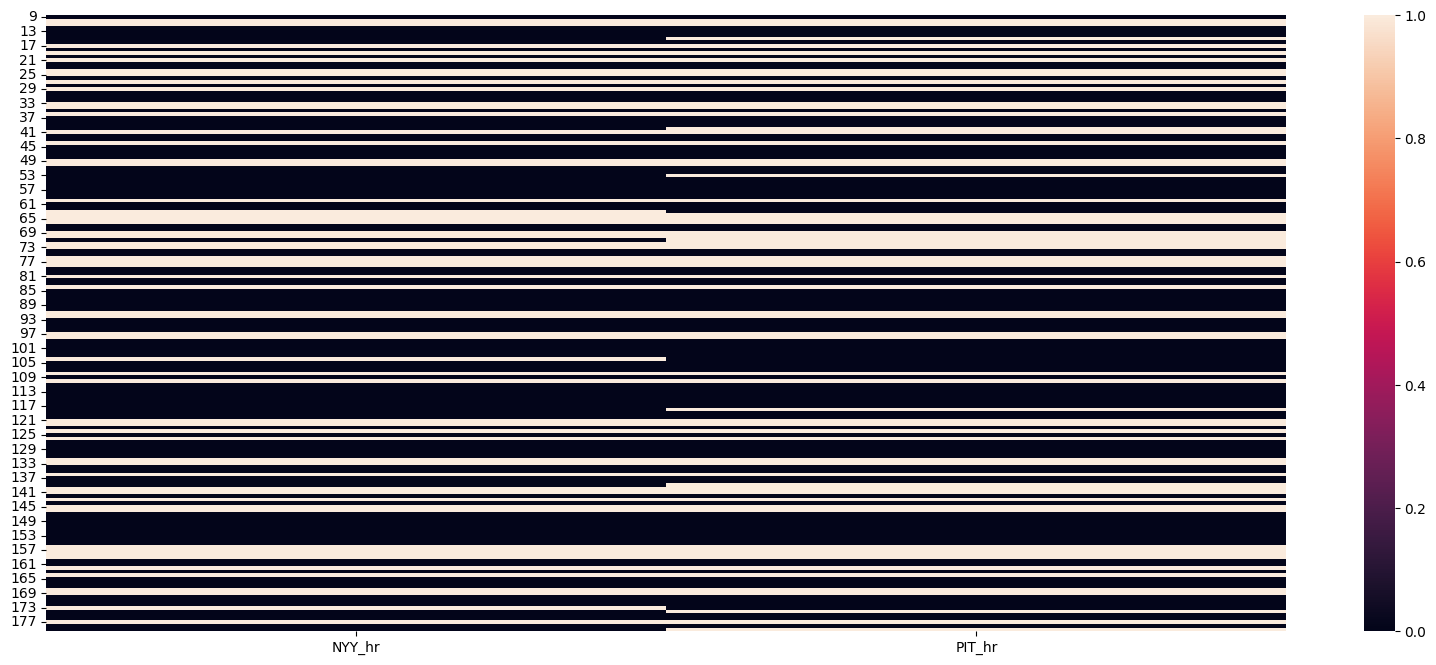

In [61]:
plt.figure(figsize=(20,8))
sns.heatmap(data=aj[['NYY_hr','PIT_hr']])

c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:299: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x


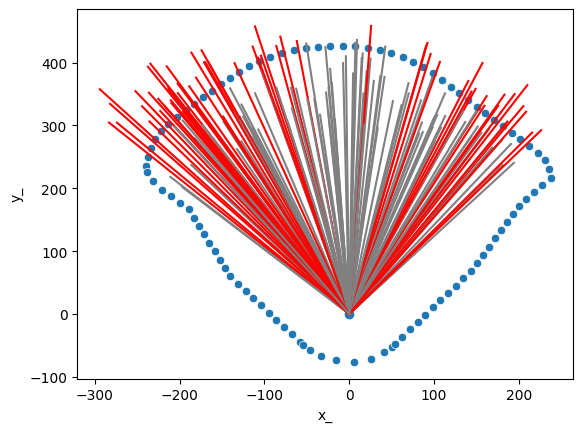

In [33]:
aj['temp_hr'] = aj[['launch_speed_fts','launch_angle_rads','plate_z','hit_distance_sc','spray_angle_true','home_team','events']].apply(lambda x: helpers.is_home_run_new_team(x[0],x[1],x[2],x[3],x[4],x[5],'NYY',x[6]),1)

sns.scatterplot(helpers.mlbam_xy_transformation(data=new_dims, x='x',y='y').query('team == "yankees" and segment == "outfield_outer"'), x='x_', y='y_')
plt.plot(0,0,marker='o')
for x, y, hr in zip(aj['hc_x_'], aj['hc_y_'],aj['temp_hr']):
    if hr == 0:
        plt.plot([0,x],[0,y],'grey')
    else:
        plt.plot([0,x],[0,y],'red')

In [34]:
# Scheduling data and function

sched = pd.read_csv('data/mlb_sched.csv')

def judge_sched(team, mlb_sched, judge_game_map):
    team_sched = mlb_sched[mlb_sched['Tm']==team]
    judge_game_map = judge_game_map.merge(team_sched[['Game_Num','Field']],left_on='Game_Num',right_on='Game_Num')
    return judge_game_map

In [50]:
aj.merge(pd.read_csv('data/judge_hit_map.csv')[['game_date','hc_x','hc_y','launch_angle','Game_Num']], left_on=['game_date','hc_x','hc_y','launch_angle'], right_on=['game_date','hc_x','hc_y','launch_angle'], how='left')

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,spray_angle_true,launch_speed_fts,launch_angle_rads,num_homers,MLBID,PLAYERNAME,batter_name,true_homerun,temp_hr,Game_Num
0,FF,2022-10-04,97.3,-1.90,5.64,"Gray, Jon",592450,592351,field_out,hit_into_play,...,20.029151,139.773333,0.750492,0,592450.0,Aaron Judge,"Judge, Aaron",0,0,160
1,SL,2022-10-04,88.4,-1.71,5.69,"Tinoco, Jesus",592450,622786,home_run,hit_into_play,...,-33.342618,146.960000,0.610865,30,592450.0,Aaron Judge,"Judge, Aaron",1,1,161
2,SI,2022-09-28,94.5,1.78,6.46,"Mayza, Tim",592450,641835,home_run,hit_into_play,...,-28.412607,172.186667,0.383972,30,592450.0,Aaron Judge,"Judge, Aaron",1,1,155
3,SL,2022-09-25,85.9,-1.79,5.62,"Bello, Brayan",592450,678394,field_out,hit_into_play,...,-14.718110,144.906667,0.767945,0,592450.0,Aaron Judge,"Judge, Aaron",0,0,152
4,FF,2022-09-24,95.1,-1.28,6.64,"Pivetta, Nick",592450,601713,field_out,hit_into_play,...,2.747242,158.546667,0.750492,0,592450.0,Aaron Judge,"Judge, Aaron",0,0,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,FF,2022-04-14,96.0,-2.54,5.87,"Gausman, Kevin",592450,592332,field_out,hit_into_play,...,-3.189726,144.320000,0.488692,0,592450.0,Aaron Judge,"Judge, Aaron",0,0,7
167,FF,2022-04-14,94.2,-2.46,5.91,"Gausman, Kevin",592450,592332,field_out,hit_into_play,...,10.502114,134.200000,0.471239,0,592450.0,Aaron Judge,"Judge, Aaron",0,0,7
168,SI,2022-04-13,91.9,-3.18,5.21,"Berríos, José",592450,621244,home_run,hit_into_play,...,-25.661900,158.986667,0.471239,30,592450.0,Aaron Judge,"Judge, Aaron",1,1,6
169,FC,2022-04-12,91.1,1.12,5.50,"Kikuchi, Yusei",592450,579328,field_out,hit_into_play,...,-32.538199,140.360000,0.506145,11,592450.0,Aaron Judge,"Judge, Aaron",0,0,5


In [42]:
aj

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,hc_y_,spray_angle_true,launch_speed_fts,launch_angle_rads,num_homers,MLBID,PLAYERNAME,batter_name,true_homerun,temp_hr
9,FF,2022-10-04,97.3,-1.90,5.64,"Gray, Jon",592450,592351,field_out,hit_into_play,...,296.635455,20.029151,139.773333,0.750492,0,592450.0,Aaron Judge,"Judge, Aaron",0,0
10,SL,2022-10-04,88.4,-1.71,5.69,"Tinoco, Jesus",592450,622786,home_run,hit_into_play,...,329.927706,-33.342618,146.960000,0.610865,30,592450.0,Aaron Judge,"Judge, Aaron",1,1
11,SI,2022-09-28,94.5,1.78,6.46,"Mayza, Tim",592450,641835,home_run,hit_into_play,...,335.842446,-28.412607,172.186667,0.383972,30,592450.0,Aaron Judge,"Judge, Aaron",1,1
12,SL,2022-09-25,85.9,-1.79,5.62,"Bello, Brayan",592450,678394,field_out,hit_into_play,...,329.104135,-14.718110,144.906667,0.767945,0,592450.0,Aaron Judge,"Judge, Aaron",0,0
13,FF,2022-09-24,95.1,-1.28,6.64,"Pivetta, Nick",592450,601713,field_out,hit_into_play,...,350.541949,2.747242,158.546667,0.750492,0,592450.0,Aaron Judge,"Judge, Aaron",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,FF,2022-04-14,96.0,-2.54,5.87,"Gausman, Kevin",592450,592332,field_out,hit_into_play,...,368.111473,-3.189726,144.320000,0.488692,0,592450.0,Aaron Judge,"Judge, Aaron",0,0
176,FF,2022-04-14,94.2,-2.46,5.91,"Gausman, Kevin",592450,592332,field_out,hit_into_play,...,332.123897,10.502114,134.200000,0.471239,0,592450.0,Aaron Judge,"Judge, Aaron",0,0
177,SI,2022-04-13,91.9,-3.18,5.21,"Berríos, José",592450,621244,home_run,hit_into_play,...,375.922923,-25.661900,158.986667,0.471239,30,592450.0,Aaron Judge,"Judge, Aaron",1,1
178,FC,2022-04-12,91.1,1.12,5.50,"Kikuchi, Yusei",592450,579328,field_out,hit_into_play,...,307.691278,-32.538199,140.360000,0.506145,11,592450.0,Aaron Judge,"Judge, Aaron",0,0
